<a href="https://colab.research.google.com/github/AnirudhPhophalia/Stock_price_rnn_lstm_model/blob/main/Stock_price_prediction_sample_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --quiet

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Downloading the tcs data of stock from 2015 to dec 2024
data = yf.download('TCS.NS', start='2015-01-01', end='2025-01-01')
close_prices = data['Close'].values.reshape(-1, 1)


/tmp/ipython-input-12-3159944940.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TCS.NS', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [13]:
# normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

In [14]:
def create_dataset(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
print("X shape:", X.shape, "y shape:", y.shape)

X shape: (2437, 30, 1) y shape: (2437, 1)


In [15]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [20]:
# creation and compliation of model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),

    # Second LSTM layer (stacked)
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dropout(0.2),

    # Dense layer for final prediction
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0228 - mae: 0.0972 - mape: 4696.4863 - val_loss: 0.0017 - val_mae: 0.0322 - val_mape: 5.2734
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0020 - mae: 0.0288 - mape: 33649.1875 - val_loss: 7.7169e-04 - val_mae: 0.0239 - val_mape: 3.8687
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0015 - mae: 0.0254 - mape: 8274.9082 - val_loss: 0.0010 - val_mae: 0.0249 - val_mape: 4.0796
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0016 - mae: 0.0255 - mape: 20358.5293 - val_loss: 8.7057e-04 - val_mae: 0.0233 - val_mape: 3.8114
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0014 - mae: 0.0244 - mape: 15972.6279 - val_loss: 0.0020 - val_mae: 0.0383 - val_mape: 6.0221
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0015 - mae: 0.0250 - mape: 9848.8770 - val_loss: 0.0018 - val_mae: 0.0360 - val_mape: 5.6780
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0013

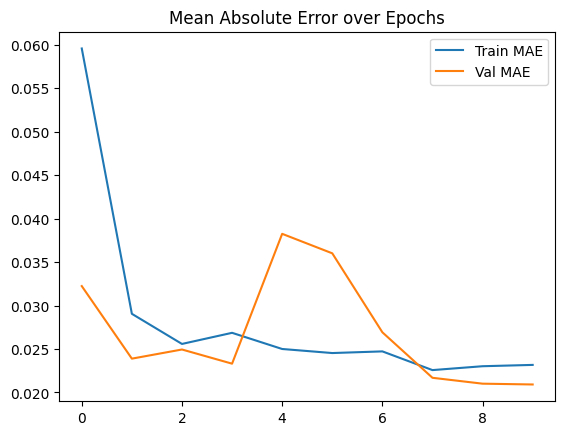

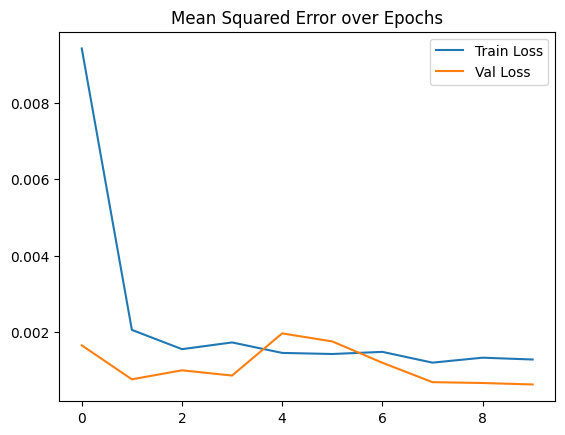

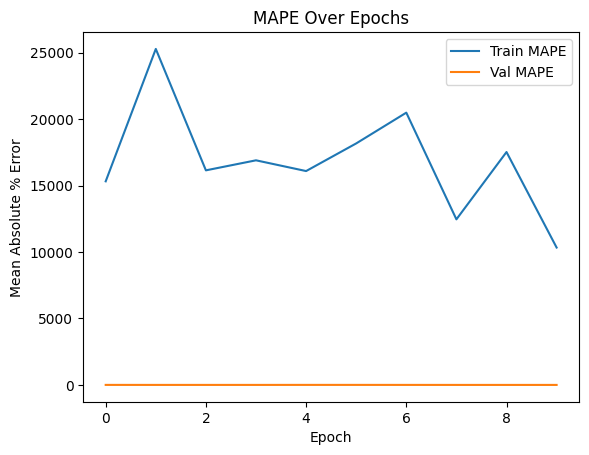

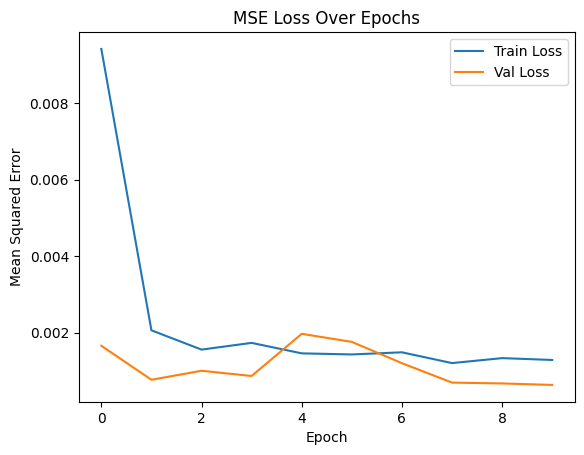

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.title('Mean Absolute Error over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Mean Squared Error over Epochs')
plt.show()


# Plot MAPE
plt.plot(history.history['mape'], label='Train MAPE')
plt.plot(history.history['val_mape'], label='Val MAPE')
plt.title('MAPE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute % Error')
plt.legend()
plt.show()

# Plot Loss (MSE)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error

# Predict
predicted = model.predict(X_test)

# Rescale back to original price
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Root Mean Squared Error (RMSE): 122.97


So what we can understand from our evaluation is taht final Validation MAE is close to 2.09 rupees, final Validation MAPE is close to 3.42% (≈96.6% accuracy) and final RMSE on Test Set: ₹122.97